In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from joblib import dump,load
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

In [2]:
df=pd.read_csv("Data/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
X=df[["TV","Radio","Newspaper"]]

In [4]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [5]:

Y=df["Sales"]

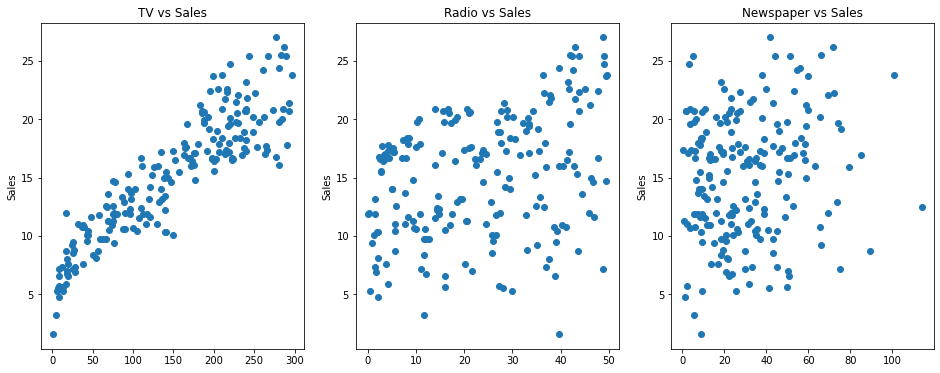

In [6]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
cols=["TV vs Sales","Radio vs Sales","Newspaper vs Sales"]
c=["TV","Radio","Newspaper"]
for i in range(3):
  axes[i].plot(df[c[i]],df["Sales"],"o")
  axes[i].set_ylabel("Sales")
  
  axes[i].set_title(cols[i])

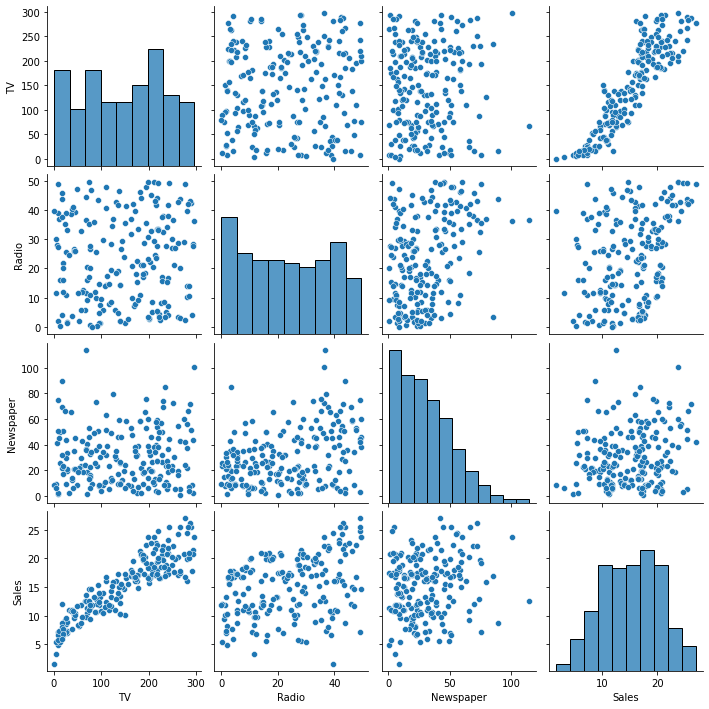

In [7]:
sns.pairplot(df)

In [8]:
 X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=101)

In [9]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=model.predict(X_test)

In [11]:
y_residuals=y_test-y_pred

In [12]:
mean_absolute_error(y_test,y_pred)

1.421722777623365

In [13]:
mse=np.sqrt(mean_squared_error(y_test,y_pred))

In [14]:
mse

1.7556016945672992

In [15]:
r2=r2_score(y_test,y_pred)

In [16]:
r2

0.8953252136294944

c:\Users\JAY AND DAKSHA\anaconda3\envs\LR\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


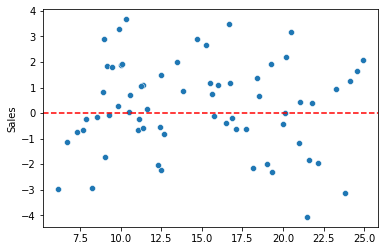

In [17]:
sns.scatterplot(y_pred,y_residuals)
plt.axhline(y=0,ls="--",color="red")

In [18]:
y_hat=model.predict(X)

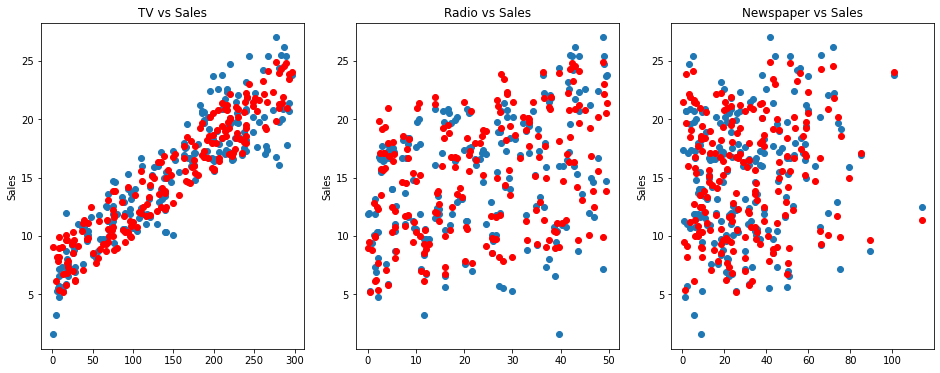

In [19]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
cols=["TV vs Sales","Radio vs Sales","Newspaper vs Sales"]
c=["TV","Radio","Newspaper"]
for i in range(3):
  axes[i].plot(df[c[i]],df["Sales"],"o")
  axes[i].plot(df[c[i]],y_hat,"o",color="red")
  axes[i].set_ylabel("Sales")
  
  axes[i].set_title(cols[i])

In [20]:
import os
os.makedirs('models',exist_ok=True)
filepath=os.path.join("models","model.joblib")
dump(model,filepath)

['models\\model.joblib']

In [21]:
load_models=load(filepath)

In [22]:
load_models.coef_

array([ 0.05475947,  0.11110453, -0.00941068])

In [23]:
X=df.drop(['Sales'],axis=1)
Y=df["Sales"]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
train_rmse_errors=[]
test_rmse_errors=[]

for d in range(1,10):
    poly=PolynomialFeatures(d,include_bias=False)
    poly_x=poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split( poly_x, Y, test_size=0.33, random_state=101)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    test_rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
    train_rmse=np.sqrt(mean_squared_error(y_train,y_pred_train))
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

    
    

In [25]:
train_rmse_errors

[1.6094199546576153,
 1.296432681300953,
 1.2343948527487951,
 1.0594929481767363,
 0.8891772577951299,
 0.9089577538329155,
 5.550325309640374,
 1.1549319058655525,
 0.2853860790644788]

In [26]:
test_rmse_errors

[1.7556016945673003,
 1.4851541585329946,
 1.4877657821785526,
 1.669168265378844,
 2.1199374281109344,
 36.596681943332655,
 1942.549874864738,
 5402.058621915709,
 469124.8257593492]

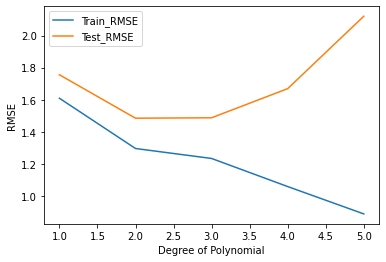

In [27]:
plt.plot(range(1,6),train_rmse_errors[:5],label="Train_RMSE")
plt.plot(range(1,6),test_rmse_errors[:5],label="Test_RMSE")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.legend()


In [64]:
X=df[["TV","Radio","Newspaper"]]
Y=df['Sales']
poly=PolynomialFeatures(4,include_bias=False)
poly_x=poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( poly_x, Y, test_size=0.33, random_state=101)
scaler=StandardScaler()
scaler_X=scaler.fit_transform(X_train)
Scaler_X_test=scaler.transform(X_test)
model=LinearRegression()
model.fit(scaler_X,y_train)
test_pred=model.predict(Scaler_X_test)
rmse=np.sqrt(mean_squared_error(y_test,test_pred))
rmse
r2=r2_score(y_test,test_pred)
r2

0.9053783894984233

In [65]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(scaler_X,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [66]:
ridge_cv_model.alpha_

0.1

In [67]:
test_pred_ridge=ridge_cv_model.predict(Scaler_X_test)

In [68]:
ridge_mse=np.sqrt(mean_squared_error(y_test,test_pred_ridge))

In [72]:
ridge_mse


1.4798724612491063

In [71]:
r2=r2_score(y_test,test_pred)
r2

0.9053783894984233